In [1]:
import cupy
import numpy as np
import math
import pandas as pd
import mathmate as mm

In [2]:
nsr = 1e-1
r = np.random.normal(size=(20000,2)) * nsr
phdiff = math.pi * np.random.uniform()
print('true phase diff (radians):', phdiff, '\t(degrees):', phdiff / (2 * math.pi) * 360)
omega = 13.56e6
t = np.arange(20000) / 500e6
rdata = np.zeros((len(t), 2))
ph0 = 2 * math.pi * np.random.uniform()
rdata[:,0] = np.sin(2 * math.pi * omega * t + ph0)
rdata[:,1] = np.sin(2 * math.pi * omega * t + phdiff + ph0)
rdata = rdata + r

true phase diff (radians): 1.2675970743775888 	(degrees): 72.62796248496655


In [3]:
rdata = np.zeros((len(np.loadtxt(r'D:\ultrassom\0-45.txt')[0:30000]), 2))
rdata[:,0] = np.loadtxt(r'D:\ultrassom\0-45.txt')[0:30000]
rdata[:,1] = np.roll(np.loadtxt(r'D:\ultrassom\0-135.txt'),0)[00000:30000]
rdata

array([[-1.0165    , -1.0165    ],
       [-1.0165    , -1.0165    ],
       [-1.0165    , -1.0165    ],
       ...,
       [ 0.02675   ,  0.1055    ],
       [ 0.03046875,  0.1070625 ],
       [ 0.031375  ,  0.1076875 ]])

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rdata)
data = scaler.transform(rdata)

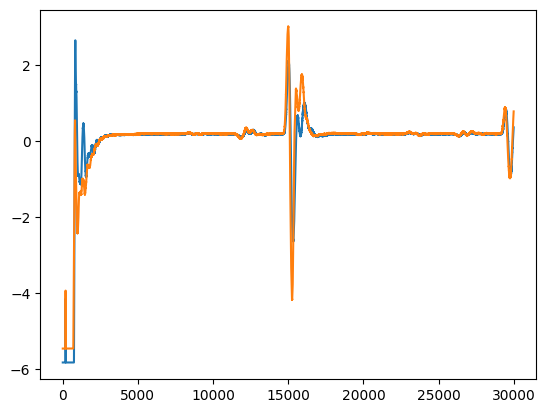

In [5]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(data)
plt.show()

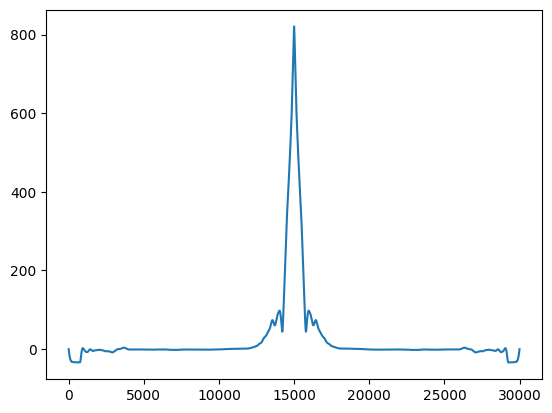

14999


In [6]:
plt.plot(mm.MYXCORR(rdata[:,0][0:15000],rdata[:,0][0:15000]))
plt.show()
print(np.argmax(mm.MYXCORR(rdata[:,0][0:15000],rdata[:,0][0:15000])))

In [7]:
data = rdata[:,0][10000:25000].tolist() + rdata[:,0][10000:25000].tolist()
mm.calculation(data, 1/2.5e9)

5.999975e-06

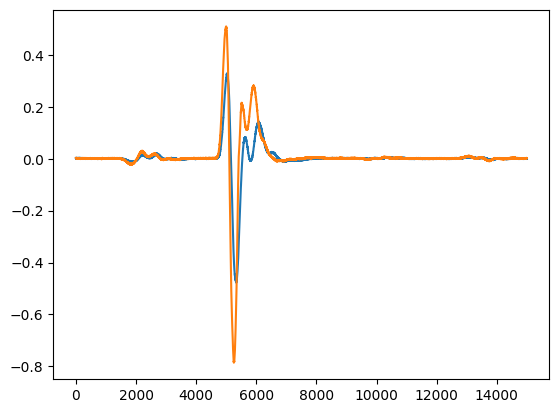

In [8]:
plt.plot(rdata[:,0][10000:25000])
plt.plot(rdata[:,1][10000:25000])
plt.show()

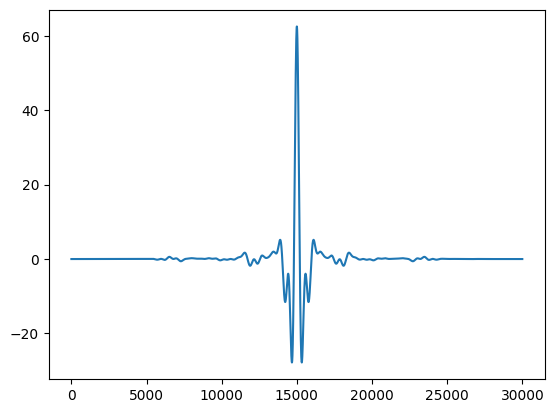

In [9]:
plt.plot(mm.MYXCORR(rdata[:,0][10000:25000],rdata[:,0][10000:25000]))
plt.show()

In [12]:
mm.calculation2(rdata[:,0][10000:25000],rdata[:,1][10000:25000], 1/(2.5e9))

-2.734999999999983e-08

In [11]:
plt.phase_spectrum(data[:,0], Fs=2.5e9)
plt.phase_spectrum(data[:,1], Fs=2.5e9)
plt.show()

TypeError: list indices must be integers or slices, not tuple